In [1]:
import psycopg2
import numpy as np
import matplotlib.pyplot as plt
from src.utils.Database_Connection import DatabaseConnection
from src.data_preparation.SequenceProcessor import SequenceProcessor
from src.data_preparation.SequenceVisualizer import SequenceVisualizer

conn = DatabaseConnection(
    host='localhost',
    database='cadets-e3-local',
    user='studi',
    password='studi',
    port=7654
)
processor = SequenceProcessor(conn)
processor.process_sequences()


print(f"Statistiken:")
print(f"Anzahl Zeilen: {processor.stats['total_rows']}")
print(f"Anzahl Sequenzen: {processor.stats['total_sequences']}")
print(f"Sequenzen nach Subject: {processor.stats['sequences_by_subject']}")
print(f"Sequenzen nach Executable: {processor.stats['sequences_by_executable']}")
print(f"Durchschnittliche Länge: {processor.stats['total_length'] / processor.stats['total_sequences']:.2f}")

InterfaceError: connection already closed

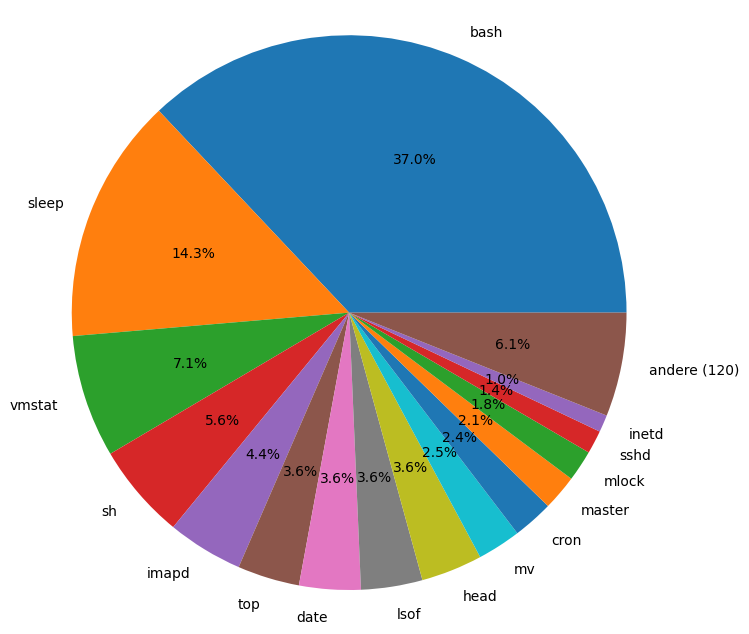

In [1]:
from src.data_preparation.SequenceVisualizer import SequenceVisualizer
import matplotlib.pyplot as plt
import psycopg2
from src.utils.Database_Connection import DatabaseConnection


conn2 = DatabaseConnection(
    host='localhost',
    database='cadets-e3-local',
    user='studi',
    password='studi',
    port=7654
)

visualizer = SequenceVisualizer(conn2)
visualizer.pie_chart_from_query(
    query='SELECT executable, count(executable) FROM sequence GROUP BY executable ORDER BY count DESC'
)


### Sequence Processor
- in diesem ersten Teil werden die Exucatables aus den Prozessen gezogen und es wird für jedes Executable ein Eintrag angelegt


### Anmerkungen
- ich habe im Gegensatz zu jannik ein primary key erstellt, um die eindeutigkeit der sequenzen zu gewährleisten
- Warum habe ich weniger Zeilen als Jannik?
    - generell habe ich ca 2000000 events und jannik ca 40000000
    - Habe ich villeicht nicht alle Daten kopiert in meinen Docker Container?
    - Hat das initial_clenaup.sql viele Daten gelöscht?
    - Ergebniss von Jannik:
        - count_rows: 41291622
        - count_sequences: 431896
        - count_sequences_by_subject: 224147
        - count_sequences_by_executable: 207749
        - avg length: 95.6036846833497
- Es ist wichtig zu beachten, das ich nur die Daten zum Training verwende, in denen keine Angriffe stattgefunden haben. Dies ist notwendig, um sicherzustellen, dass die Trainingsdaten nur gutartige Daten enthalten. 
    - der erste Angriff hat am 2018-04-06 um 11:00 Uhr stattgefunden
- Wichtig ist zu schauen, das beim filtern der einzelnen Sequenzen im Prozess nicht nach dem executable gruppiert wird, da sonst 2 eigentlich unterschiedliche Sequenzen zu einer Sequenz zusammengefasst werden, wenn sie das gleiche executable haben.
    - dieses Problem wird gelöst, indem die sequenzen nach der sequence_long geordnet werden, diese gibt nämlich die Reihenfolge der events an

    

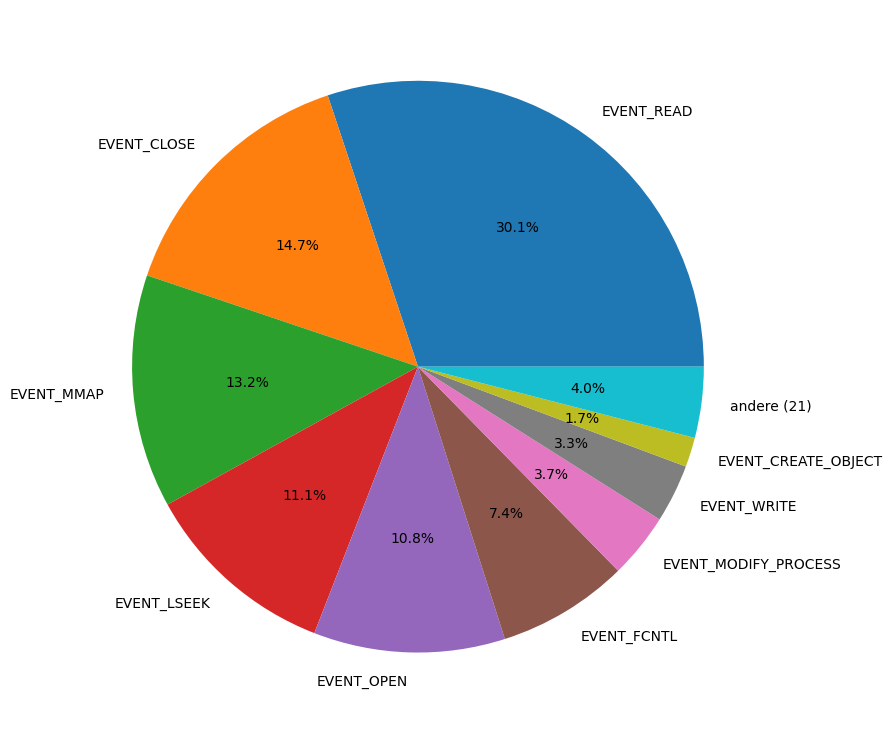

In [5]:
from src.data_preparation.SequenceEventVisualizer import SequenceEventVisualizer
import matplotlib.pyplot as plt
import psycopg2
from src.utils.Database_Connection import DatabaseConnection


conn3 = DatabaseConnection(
    host='localhost',
    database='cadets-e3-local',
    user='studi',
    password='studi',
    port=7654
)

visualizer = SequenceEventVisualizer(conn3)
visualizer.create_pie_chart(
    query='select event_type, count(*) from sequence_events group by event_type order by count desc;'
)

In [2]:
from SequenceEventProcessor import SequenceEventProcessor
from utils.Database_Connection import DatabaseConnection


conn = DatabaseConnection(
    host='localhost',
    database='cadets-e3-local',
    user='studi',
    password='studi',
    port=7654
)

events_processor = SequenceEventProcessor(conn)
events_processor.process_sequence_events()

print(events_processor.stats)

{'total_events': 21307067, 'total_sequences': 131603}


In [1]:
from Sequence_Exporter import SequenceDataExporter
from utils.Database_Connection import DatabaseConnection


conn2 = DatabaseConnection(
    host='localhost',
    database='cadets-e3-local',
    user='studi',
    password='studi',
    port=7654
)

exporter = SequenceDataExporter(conn2)
exporter.export_sequences("data/raw/data.npy", "data/raw/targets.npy")



['EVENT_CLOSE', 'EVENT_OPEN', 'EVENT_CLOSE', 'EVENT_EXECUTE', 'EVENT_OPEN', 'EVENT_READ', 'EVENT_CLOSE', 'EVENT_OPEN', 'EVENT_READ', 'EVENT_READ', 'EVENT_CLOSE', 'EVENT_OPEN', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_CLOSE', 'EVENT_OPEN', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_CLOSE', 'EVENT_OPEN', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_CLOSE', 'EVENT_OPEN', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_CLOSE', 'EVENT_OPEN', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_CLOSE', 'EVENT_OPEN', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_CLOSE', 'EVENT_OPEN', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_MMAP', 'EVENT_CLOSE', 'EVENT_OPEN', 'EVENT_MMAP', 'EVENT_MMAP', 'EVEN